# <u>Analyzing Traffic Accident Data<u>

## IMPLEMENTATION OF THE DATASET

- Import all the libraries needed and read the file.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
mydata=pd.read_csv("...\\dft-road-casualty-statistics-accident-last-5-years.csv", low_memory=False)
mydata2=pd.read_csv("...\\dft-road-casualty-statistics-casualty-last-5-years.csv", low_memory=False)
mydata3=pd.read_csv("...\\dft-road-casualty-statistics-vehicle-last-5-years.csv", low_memory=False)
mydata4=pd.read_csv("...\\pop.csv", low_memory=False)

- Merge the files

In [2]:
df1 = pd.DataFrame(mydata)
df2 = pd.DataFrame(mydata2)
df3 = pd.DataFrame(mydata3)
dfp = pd.DataFrame(mydata4)

In [3]:
datasetx=pd.merge(mydata, mydata2)
dataset=pd.merge(datasetx, mydata3)

In [4]:
ddf=pd.DataFrame(dataset)

- Associate a numeric index to the accident_index column to highlight the number of accidents.

In [5]:
ddf.reset_index(level=0, inplace=True)
ddf

index accident_index  accident_year accident_reference  \
0            0  2016010000005           2016          010000005   
1            1  2016010000006           2016          010000006   
2            2  2016010000008           2016          010000008   
3            3  2016010000016           2016          010000016   
4            4  2016010000018           2016          010000018   
...        ...            ...            ...                ...   
781711  781711  2020991027064           2020          991027064   
781712  781712  2020991029573           2020          991029573   
781713  781713  2020991030297           2020          991030297   
781714  781714  2020991030900           2020          991030900   
781715  781715  2020991032575           2020          991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    519310.0                188730.0  -0.279323  51.584754   
1                    551920.0                174560.0   0.184928  51.449595   
2                    505930.0                183850.0  -0.473837  51.543563   
3                    527770.0                168930.0  -0.164442  51.404958   
4                    510740.0                177230.0  -0.406580  51.483139   
...                       ...                     ...        ...        ...   
781711               343034.0                731654.0  -2.926320  56.473539   
781712               257963.0                658891.0  -4.267565  55.802353   
781713               383664.0                810646.0  -2.271903  57.186317   
781714               277161.0                674852.0  -3.968753  55.950940   
781715               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  ...  journey_purpose_of_driver  \
0                  1                  3  ...                          6   
1                  1                  3  ...                          6   
2                  1                  3  ...                          6   
3                  1                  3  ...                          1   
4                  1                  3  ...                          6   
...              ...                ...  ...                        ...   
781711            99                  2  ...                          5   
781712            99                  3  ...                          3   
781713            99                  2  ...                          5   
781714            99                  3  ...                          6   
781715            99                  3  ...                          6   

        sex_of_driver age_of_driver  age_band_of_driver engine_capacity_cc  \
0                   1            23                   5                124   
1                   2            36                   7               1461   
2                   1            24                   5               1390   
3                   1            55                   8               6692   
4                   1            28                   6                 -1   
...               ...           ...                 ...                ...   
781711              1            11                   3                 -1   
781712              2            39                   7               1598   
781713              1            38                   7               1301   
781714              1            76                  11                 -1   
781715              1            39                   7                999   

        propulsion_code age_of_vehicle  generic_make_model  driver_imd_decile  \
0                     1              4                  -1                  4   
1                     2              1                  -1                 10   
2                     1              5                  -1                  8   
3                     2              7                  -1                  9   
4           

## MISSING VALUES

- With the "isnull" command, let's see the errors (null values) in every column, and how many there are.

In [6]:
ddf.isnull().sum().head(39)

index                                            0
accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          171
location_northing_osgr                         171
longitude                                      185
latitude                                       185
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number              

In [7]:
ddf.isnull().sum().tail(35)

sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
vehicle_type                          0
towing_and_articulation               0
vehicle_manoeuvre                     0
vehicle_direction_from                0
vehicle_direction_to                  0
vehicle_location_restricted_lane      0
junction_location                     0
skidding_and_overturning              0
hit_object_in_carriageway             0
vehicle_leaving_carriageway           0
hit_object_off_carriageway            0
first_point_of_impact                 0
vehicle_left_hand_drive               0


- Since the rows with Nan values are very few, I decided (with the help of the excel file "Road-Safety-Open-Dataset-Data-Guide") to analyze every column first.

In [8]:
MV = ddf['engine_capacity_cc'] == -1
unique ,counts = np.unique(MV,return_counts=True)
print ("The number of missing values is: ", counts[1])

The number of missing values is:  177764


In [9]:
ddf['engine_capacity_cc'].value_counts()

-1       177764
 1598     45238
 998      24074
 125      21782
 1968     21307
          ...  
 894          1
 4988         1
 558          1
 2766         1
 1            1
Name: engine_capacity_cc, Length: 1440, dtype: int64

- Dealing with missing values, I used different functions depending on the situation. As a matter of fact, rows with "-1" values cannot be simply erased, but need to be evaluated in a more complex way.

In [10]:
# change "-1" in the speed_limit column, with a value that is 50 if it is in an urban area, or 70 if rural
def speed_limit_replacement(x):
    if x.speed_limit == -1:
        
        if x.urban_or_rural_area == 1:
            return 50
        else: 
            if x.urban_or_rural_area == 2:
                return 70
            else:
                return 10
    else:
        return x.speed_limit

In [11]:
# change "-1" in the age_band_of_casualty column, with a value that corrispond to the age of casualty
def age_band_of_casualty_replace(x):
    if x.age_band_of_casualty == -1:
        
        if x.age_of_casualty<0 and x.age_of_casualty<5:
            return 1
        else: 
            if x.age_of_casualty<6 and x.age_of_casualty<10:
                return 2
            else:
                if x.age_of_casualty<11 and x.age_of_casualty<15:
                    return 3
                else: 
                    if x.age_of_casualty<16 and x.age_of_casualty<20:
                        return 4
                    else: 
                        if x.age_of_casualty<21 and x.age_of_casualty<25:
                            return 5
                        else:
                            if x.age_of_casualty<26 and x.age_of_casualty<35:
                                return 6
                            else: 
                                if x.age_of_casualty<36 and x.age_of_casualty<45:
                                    return 7
                                else: 
                                    if x.age_of_casualty<46 and x.age_of_casualty<55:
                                        return 8
                                    else:
                                        if x.age_of_casualty<56 and x.age_of_casualty<65:
                                            return 9
                                        else: 
                                            if x.age_of_casualty<66 and x.age_of_casualty<75:
                                                return 10
                                            else:
                                                if x.age_of_casualty>75:
                                                    return 11
                                                else:
                                                    return 6
    else:
        return x.age_band_of_casualty

In [12]:
# change "-1" in the age_band_of_driver column, with a value that corrispond to the age of driver
def age_band_of_driver_replace(x):
    if x.age_band_of_driver == -1:
        
        if x.age_of_driver<0 and x.age_of_driver<5:
            return 1
        else: 
            if x.age_of_driver<6 and x.age_of_driver<10:
                return 2
            else:
                if x.age_of_driver<11 and x.age_of_driver<15:
                    return 3
                else: 
                    if x.age_of_driver<16 and x.age_of_driver<20:
                        return 4
                    else: 
                        if x.age_of_driver<21 and x.age_of_driver<25:
                            return 5
                        else:
                            if x.age_of_driver<26 and x.age_of_driver<35:
                                return 6
                            else: 
                                if x.age_of_driver<36 and x.age_of_driver<45:
                                    return 7
                                else: 
                                    if x.age_of_driver<46 and x.age_of_driver<55:
                                        return 8
                                    else:
                                        if x.age_of_driver<56 and x.age_of_driver<65:
                                            return 9
                                        else: 
                                            if x.age_of_driver<66 and x.age_of_driver<75:
                                                return 10
                                            else:
                                                if x.age_of_driver>75:
                                                    return 11
                                                else:
                                                    return 6
    else:
        return x.age_band_of_driver

In [13]:
# change "-1" in the engine_capacity_cc column, with a value that correlates with the vehicle type
def engine_capacity_cc_replacement(x):
    if x.engine_capacity_cc == -1:
        if x.vehicle_type=='1': 
            return 0
        else: 
            if x.vehicle_type=='2' or x.vehicle_type=='23' or x.vehicle_type=='103': #motorcycle 50CC
                return 50
            else: 
                if x.vehicle_type=='3' or x.vehicle_type=='97' or x.vehicle_type=='104' or x.vehicle_type=='106': 
                    return 125
                else: 
                    if x.vehicle_type=='4' or x.vehicle_type=='105': #motorcycle 250CC
                        return 250
                    else: 
                        if x.vehicle_type=='5': #motorcycle 500CC
                            return 500
                        else: 
                            if x.vehicle_type=='8' or x.vehicle_type=='108': #taxi
                                return 1500
                            else: 
                                if x.vehicle_type=='9' or x.vehicle_type=='109': #car: 
                                    return 1598
                                else: 
                                    if x.vehicle_type=='10' or x.vehicle_type=='110': #minibus
                                        return 2500
                                    else: 
                                        if x.vehicle_type=='11': #bus or coach
                                            return 12000
                                        else: 
                                            if x.vehicle_type=='16': #ridden horse
                                                return 0
                                            else: 
                                                if x.vehicle_type=='17': #agricultural vehicle
                                                    return 895
                                                else: 
                                                    if x.vehicle_type=='18': #tram
                                                        return 0
                                                    else: 
                                                        if x.vehicle_type=='19' or x.vehicle_type=='98': #goods 3.5 tonnes
                                                            return 3000
                                                        else: 
                                                            if x.vehicle_type=='20' or x.vehicle_type=='113': #goods > 3.5 tonn
                                                                return 5000
                                                            else: 
                                                                if x.vehicle_type=='21': #goods 7.5 tonnes
                                                                    return 15000
                                                                else: 
                                                                    if x.vehicle_type=='22': #mobility scooter
                                                                        return 0
                                                                    else: 
                                                                        if x.vehicle_type=='90': #other vehicle
                                                                            return 90
                                                                        else: 
                                                                            if x.vehicle_type=='99': #unknown vehicle type
                                                                                return 99
                                                                            else: 
                                                                                return 90 #other vehicle
    else:
        return x.engine_capacity_cc

In [14]:
ddf['speed_limit'] = ddf.apply(speed_limit_replacement, axis=1)

In [15]:
ddf['road_type'] = ddf['road_type'].replace(-1,np.nan)
ddf['junction_detail'] = ddf['junction_detail'].replace(-1,np.nan)
ddf['junction_control'] = ddf['junction_control'].replace(-1,9)
ddf['pedestrian_crossing_human_control'] = ddf['pedestrian_crossing_human_control'].replace(-1,9)
ddf['pedestrian_crossing_physical_facilities'] = ddf['pedestrian_crossing_physical_facilities'].replace(-1,9)
ddf['light_conditions'] = ddf['light_conditions'].replace(-1,np.nan)
ddf['weather_conditions'] = ddf['weather_conditions'].replace(-1,np.nan)
ddf['road_surface_conditions'] = ddf['road_surface_conditions'].replace(-1,9)
ddf['special_conditions_at_site'] = ddf['special_conditions_at_site'].replace(-1,0)
ddf['carriageway_hazards'] = ddf['carriageway_hazards'].replace(-1,0)
ddf['urban_or_rural_area'] = ddf['urban_or_rural_area'].replace(-1,np.nan)
ddf['did_police_officer_attend_scene_of_accident'] = ddf['did_police_officer_attend_scene_of_accident'].replace(-1,np.nan)
ddf['trunk_road_flag'] = ddf['trunk_road_flag'].replace(-1,2)

In [16]:
ddf['sex_of_casualty'] = ddf['sex_of_casualty'].replace(-1,9)
ddf['age_of_casualty'] = ddf['age_of_casualty'].replace(-1,np.nan) #replace value with the before value
ddf['age_of_casualty'] = ddf['age_of_casualty'].fillna(method="ffill") #replace value with the before value
ddf['age_band_of_casualty'] = ddf.apply(age_band_of_casualty_replace, axis=1)
ddf['pedestrian_location'] = ddf['pedestrian_location'].replace(-1,10)
ddf['pedestrian_movement'] = ddf['pedestrian_movement'].replace(-1,9)
ddf['car_passenger'] = ddf['car_passenger'].replace(-1,9)
ddf['bus_or_coach_passenger'] = ddf['bus_or_coach_passenger'].replace(-1,9)
ddf['casualty_type'] = ddf['casualty_type'].replace(-1,99)
ddf['casualty_home_area_type'] = ddf['casualty_home_area_type'].replace(-1,np.nan) #replace value with the before value
ddf['casualty_home_area_type'] = ddf['casualty_home_area_type'].fillna(method="ffill") #replace with before value
ddf['casualty_imd_decile'] = ddf['casualty_imd_decile'].replace(-1,np.nan) #replace value with the before value
ddf['casualty_imd_decile'] = ddf['casualty_imd_decile'].fillna(method="ffill") #replace with before value

In [17]:
ddf['vehicle_type'] = ddf['vehicle_type'].replace(-1,99)
ddf['towing_and_articulation'] = ddf['towing_and_articulation'].replace(-1,9)
ddf['vehicle_manoeuvre'] = ddf['vehicle_manoeuvre'].replace(-1,99)
ddf['vehicle_direction_from'] = ddf['vehicle_direction_from'].replace(-1,9)
ddf['vehicle_direction_to'] = ddf['vehicle_direction_to'].replace(-1,9)
ddf['vehicle_location_restricted_lane'] = ddf['vehicle_location_restricted_lane'].replace(-1,99)
ddf['junction_location'] = ddf['junction_location'].replace(-1,9)
ddf['skidding_and_overturning'] = ddf['skidding_and_overturning'].replace(-1,9)
ddf['hit_object_off_carriageway'] = ddf['hit_object_off_carriageway'].replace(-1,99)
ddf['first_point_of_impact'] = ddf['first_point_of_impact'].replace(-1,9)
ddf['vehicle_left_hand_drive'] = ddf['vehicle_left_hand_drive'].replace(-1,9)
ddf['journey_purpose_of_driver'] = ddf['journey_purpose_of_driver'].replace(-1,6)
ddf['sex_of_driver'] = ddf['sex_of_driver'].replace(-1,3)
ddf['age_of_driver'] = ddf['age_of_driver'].replace(-1,np.nan) #replace value with the previous value
ddf['age_of_driver'] = ddf['age_of_driver'].fillna(method="ffill") #replace with previous value

In [18]:
ddf['engine_capacity_cc'] = ddf['engine_capacity_cc'].replace(90,np.nan)
ddf['engine_capacity_cc'] = ddf['engine_capacity_cc'].replace(99,np.nan)
ddf['engine_capacity_cc'] = ddf['engine_capacity_cc'].fillna(method="ffill")
ddf['engine_capacity_cc'] = ddf.apply(engine_capacity_cc_replacement, axis=1)

In [19]:
ddf['age_band_of_driver'] = ddf.apply(age_band_of_driver_replace, axis=1)
ddf['propulsion_code'] = ddf['propulsion_code'].replace(-1,np.nan) #replace value with the before value
ddf['propulsion_code'] = ddf['propulsion_code'].fillna(method="ffill") #replace with before value (since it can be petrol or diesel)
ddf['age_of_vehicle'] = ddf['age_of_vehicle'].replace(-1,np.nan) #replace value with the before value
ddf['age_of_vehicle'] = ddf['age_of_vehicle'].fillna(method="ffill") #replace with before value (since it can vary between 1 - 30 years)
ddf['driver_imd_decile'] = ddf['driver_imd_decile'].replace(-1,np.nan) #replace value with the before value
ddf['driver_imd_decile'] = ddf['driver_imd_decile'].fillna(method="ffill") #replace with before value (since it can vary between 1- 10)
ddf['driver_home_area_type'] = ddf['driver_home_area_type'].replace(-1,np.nan) #replace value with the before value
ddf['driver_home_area_type'] = ddf['driver_home_area_type'].fillna(method="ffill") #replace with before value (1, 2 or 3)


ddf = ddf.dropna()
ddf.isnull().sum().head(20)

index                           0
accident_index                  0
accident_year                   0
accident_reference              0
location_easting_osgr           0
location_northing_osgr          0
longitude                       0
latitude                        0
police_force                    0
accident_severity               0
number_of_vehicles              0
number_of_casualties            0
date                            0
day_of_week                     0
time                            0
local_authority_district        0
local_authority_ons_district    0
local_authority_highway         0
first_road_class                0
first_road_number               0
dtype: int64

# OUTLIERS

- Outliers need to managed in order to have a correct visualization of the data.

- Defining boxplot function.

In [20]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

- Here are the number of vehicles involved for each accident.

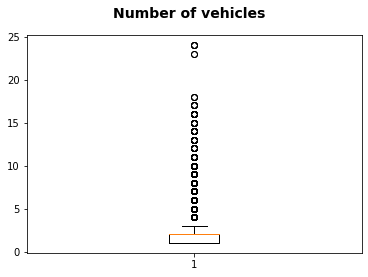

In [21]:
fig = plt.figure()
fig.suptitle('Number of vehicles', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(ddf['number_of_vehicles'])

plt.show()

- So I have found where the outliers are.

In [22]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25) #first quartile
    Q3 = df[ft].quantile(0.75) #third quartile
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #now create a list made of values smaller than the lower limit and those greater than the upper limit.
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [23]:
#create a list where the found values are saved
index_list = []
for feature in ['number_of_vehicles']:
    index_list.extend(outliers(ddf, feature))

- Remove these outliers

In [24]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [25]:
ddf_cleaned = remove(ddf, index_list)

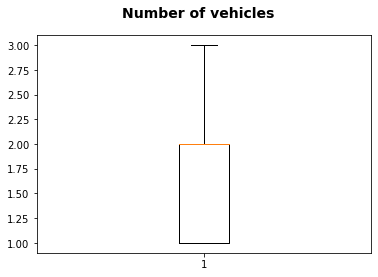

In [26]:
fig = plt.figure()
fig.suptitle('Number of vehicles', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(ddf_cleaned['number_of_vehicles'])

plt.show()

- However to prevent relevant data loss from the dataset, I have decided not to remove outliers.

- Here are the summary statistics.

In [27]:
ddf.describe()[['index','accident_severity','number_of_vehicles','number_of_casualties',
                'engine_capacity_cc','age_of_casualty','casualty_severity','age_of_vehicle']]

index  accident_severity  number_of_vehicles  \
count  781431.000000      781431.000000       781431.000000   
mean   390860.286737           2.774349            1.934615   
std    225670.260671           0.457891            0.786775   
min         0.000000           1.000000            1.000000   
25%    195430.500000           3.000000            1.000000   
50%    390845.000000           3.000000            2.000000   
75%    586325.500000           3.000000            2.000000   
max    781715.000000           3.000000           24.000000   

       number_of_casualties  engine_capacity_cc  age_of_casualty  \
count         781431.000000       781431.000000    781431.000000   
mean               1.745059         1331.686732        37.314464   
std                1.613331         1344.700646        18.866115   
min                1.000000            1.000000         0.000000   
25%                1.000000          124.000000        23.000000   
50%                1.000000         1363.000000        34.000000   
75%                2.000000         1798.000000        50.000000   
max               59.000000        91000.000000       102.000000   

       casualty_severity  age_of_vehicle  
count      781431.000000   781431.000000  
mean            2.825584        7.903674  
std             0.407366        5.586987  
min             1.000000        0.000000  
25%             3.000000        3.000000  
50%             3.000000        7.000000  
75%             3.000000       12.000000  
max             3.000000       96.000000

## GENERAL ANALYSIS/VISUALIZATION

### VISUALIZING DISTRIBUTIONS OF DATA

- Distrubution of accidents per casualty type.

In [28]:
ddr=ddf.copy()

In [29]:
ddr['casualty_type'].replace([0,1,2,3,4,5,8,9,10,11,16,17,18,19,20,21,22,23,90,97,98,99],\
   ['pedestrian','cyclist','motorcycle 50cc and under','motorcycle under 125cc','motorcycle over 125cc and up to 500cc',
    'motorcycle over 500cc','taxi', 'car', 'minibus','bus or coach', 'horse rider','agricultural vehicle',
    'tram','goods vehicle < 3.5t','goods vehicle >3.5t and <7.5t','good vehicles > 7.5t','mobility scooter',
    'electric motorcycle','other vehicle','motorcycle unknown cc','goods vehicle unknown weight',
    'unknown vehicle type'], inplace=True)

count      mean       std  min  25%  \
casualty_type                                                                   
agricultural vehicle                      464.0  2.109914  2.618836  1.0  1.0   
bus or coach                            16871.0  3.838184  7.360761  1.0  1.0   
car                                    443004.0  2.034151  1.282123  1.0  1.0   
cyclist                                 87494.0  1.046929  0.259004  1.0  1.0   
electric motorcycle                       298.0  1.130872  0.337828  1.0  1.0   
good vehicles > 7.5t                     3075.0  1.833171  1.487250  1.0  1.0   
goods vehicle < 3.5t                    19879.0  1.952865  1.195306  1.0  1.0   
goods vehicle >3.5t and <7.5t            1441.0  2.309507  2.859434  1.0  1.0   
goods vehicle unknown weight             1026.0  2.250487  1.568788  1.0  1.0   
horse rider                               403.0  1.181141  0.428397  1.0  1.0   
minibus                                  1437.0  4.442589  3.365451  1.0  2.0   
mobility scooter                          959.0  1.055266  0.246205  1.0  1.0   
motorcycle 50cc and under                7218.0  1.077168  0.292158  1.0  1.0   
motorcycle over 125cc and up to 500cc    9925.0  1.145592  0.404108  1.0  1.0   
motorcycle over 500cc                   27056.0  1.206572  0.498027  1.0  1.0   
motorcycle under 125cc                  38221.0  1.092279  0.327668  1.0  1.0   
motorcycle unknown cc                    1235.0  1.179757  0.476425  1.0  1.0   
other vehicle                            3015.0  1.766833  1.282712  1.0  1.0   
pedestrian                             106278.0  1.137291  0.573033  1.0  1.0   
taxi                                    12076.0  2.114607  1.428529  1.0  1.0   
tram                                       41.0  3.048780  2.120745  1.0  1.0   
unknown vehicle type                       15.0  1.133333  0.351866  1.0  1.0   

                                       50%  75%   max  
casualty_type                                          
agricultural vehicle                   1.0  2.0  15.0  
bus or coach                           1.0  3.0  59.0  
car                                    2.0  3.0  58.0  
cyclist                                1.0  1.0  10.0  
electric motorcycle                    1.0  1.0   2.0  
good vehicles > 7.5t                   1.0  2.0  33.0  
goods vehicle < 3.5t                   2.0  2.0  19.0  
goods vehicle >3.5t and <7.5t          2.0  2.0  23.0  
goods vehicle unknown weight           2.0  3.0  11.0  
horse rider                            1.0  1.0   3.0  
minibus                                3.0  6.0  14.0  
mobility scooter                       1.0  1.0   3.0  
motorcycle 50cc and under              1.0  1.0   5.0  
motorcycle over 125cc and up to 500cc  1.0  1.0   6.0  
motorcycle over 500cc                  1.0  1.0   8.0  
motorcycle under 125cc                 1.0  1.0   9.0  
motorcycle unknown cc                  1.0  1.0   5.0  
other vehicle                          1.0  2.0  10.0  
pedestrian                             1.0  1.0  19.0  
taxi                                   2.0  3.0  12.0  
tram                                   2.0  4.0   7.0  
unknown vehicle type                   1.0  1.0   2.0

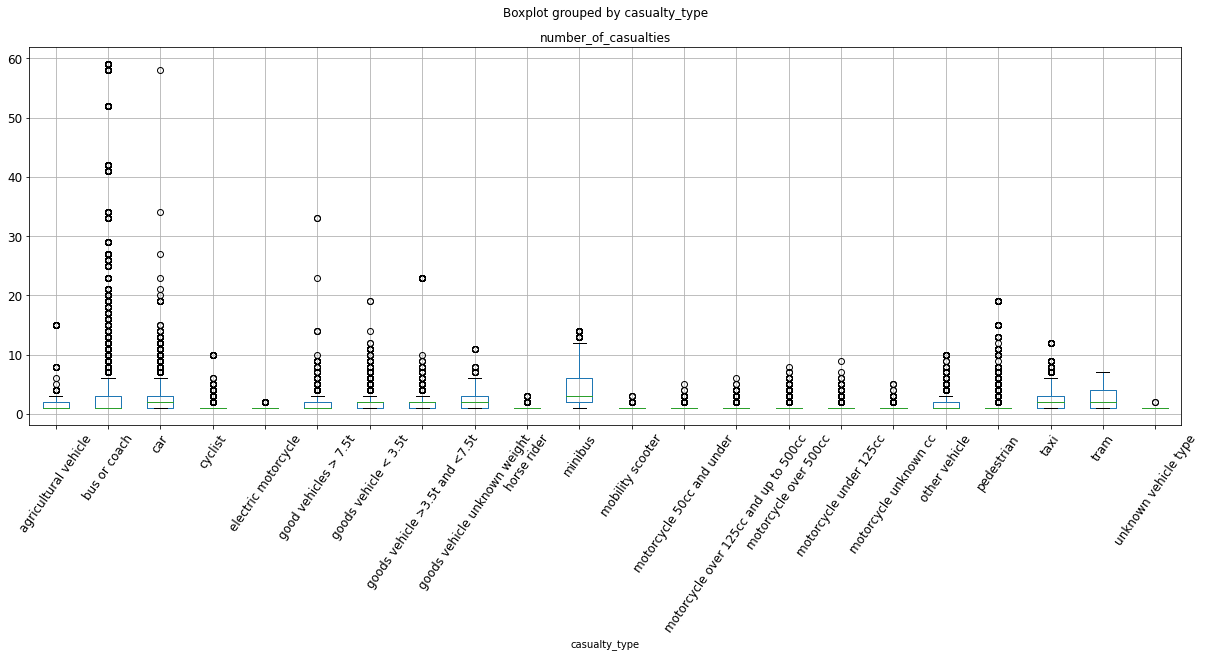

In [30]:
ddr.boxplot('number_of_casualties','casualty_type',rot = 55,figsize=(20,7),fontsize=12)

ddr.groupby(['casualty_type']).describe()['number_of_casualties']

- Distribution of accidents per age band of casualty.

count      mean       std  min  25%  50%  75%   max
age_band_of_casualty                                                        
0-5                    14276.0  2.357033  1.722484  1.0  1.0  2.0  3.0  34.0
11-15                  33743.0  2.126900  4.331948  1.0  1.0  1.0  2.0  59.0
16-20                  81213.0  1.859493  1.571357  1.0  1.0  1.0  2.0  59.0
21-25                  94141.0  1.729756  1.389877  1.0  1.0  1.0  2.0  52.0
26-35                 165193.0  1.670434  1.228298  1.0  1.0  1.0  2.0  52.0
36-45                 121320.0  1.664441  1.216103  1.0  1.0  1.0  2.0  34.0
46-55                 110550.0  1.638281  1.211161  1.0  1.0  1.0  2.0  59.0
56-65                  68605.0  1.672079  1.267567  1.0  1.0  1.0  2.0  59.0
6-10                   21174.0  2.230094  1.962706  1.0  1.0  2.0  3.0  58.0
66-75                  39437.0  1.771382  1.641883  1.0  1.0  1.0  2.0  58.0
over 75                31779.0  1.686428  1.455145  1.0  1.0  1.0  2.0  52.0

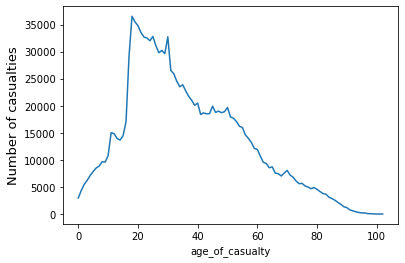

In [31]:
ddr['age_band_of_casualty'].replace([1,2,3,4,5,6,7,8,9,10,11],['0-5','6-10','11-15','16-20','21-25','26-35',
                                                               '36-45','46-55','56-65','66-75','over 75'],inplace=True)

plt.ylabel('Number of casualties', size=13)
ddr.groupby(['age_of_casualty']).sum()['number_of_casualties'].plot()

ddr.groupby(['age_band_of_casualty']).describe()['number_of_casualties']

- Number of total fatalities and percentage on total casualties.

In [32]:
fat=ddf[ddf['casualty_severity']==1]['number_of_casualties'].sum()
perc_fat= (fat/ddf['number_of_casualties'].sum())*100

print("The total number of fatalities in the period is", fat, ", which accounts for", perc_fat.round(2),
      "% of total casualties.")

The total number of fatalities in the period is 15644 , which accounts for 1.15 % of total casualties.


- Distrubution of fatalities per vehicle type.

                                       number_of_casualties
vehicle_type                                               
agricultural vehicle                                     24
bus or coach                                            328
car                                                   10635
cyclist                                                 635
electric motorcycle                                       1
good vehicles > 7.5t                                    393
goods vehicle < 3.5t                                    605
goods vehicle >3.5t and <7.5t                            66
goods vehicle unknown weight                             57
horse rider                                               5
minibus                                                 206
mobility scooter                                         46
motorcycle 50cc and under                                34
motorcycle over 125cc and up to 500cc                   266
motorcycle over 500cc                   

<function matplotlib.pyplot.show(close=None, block=None)>

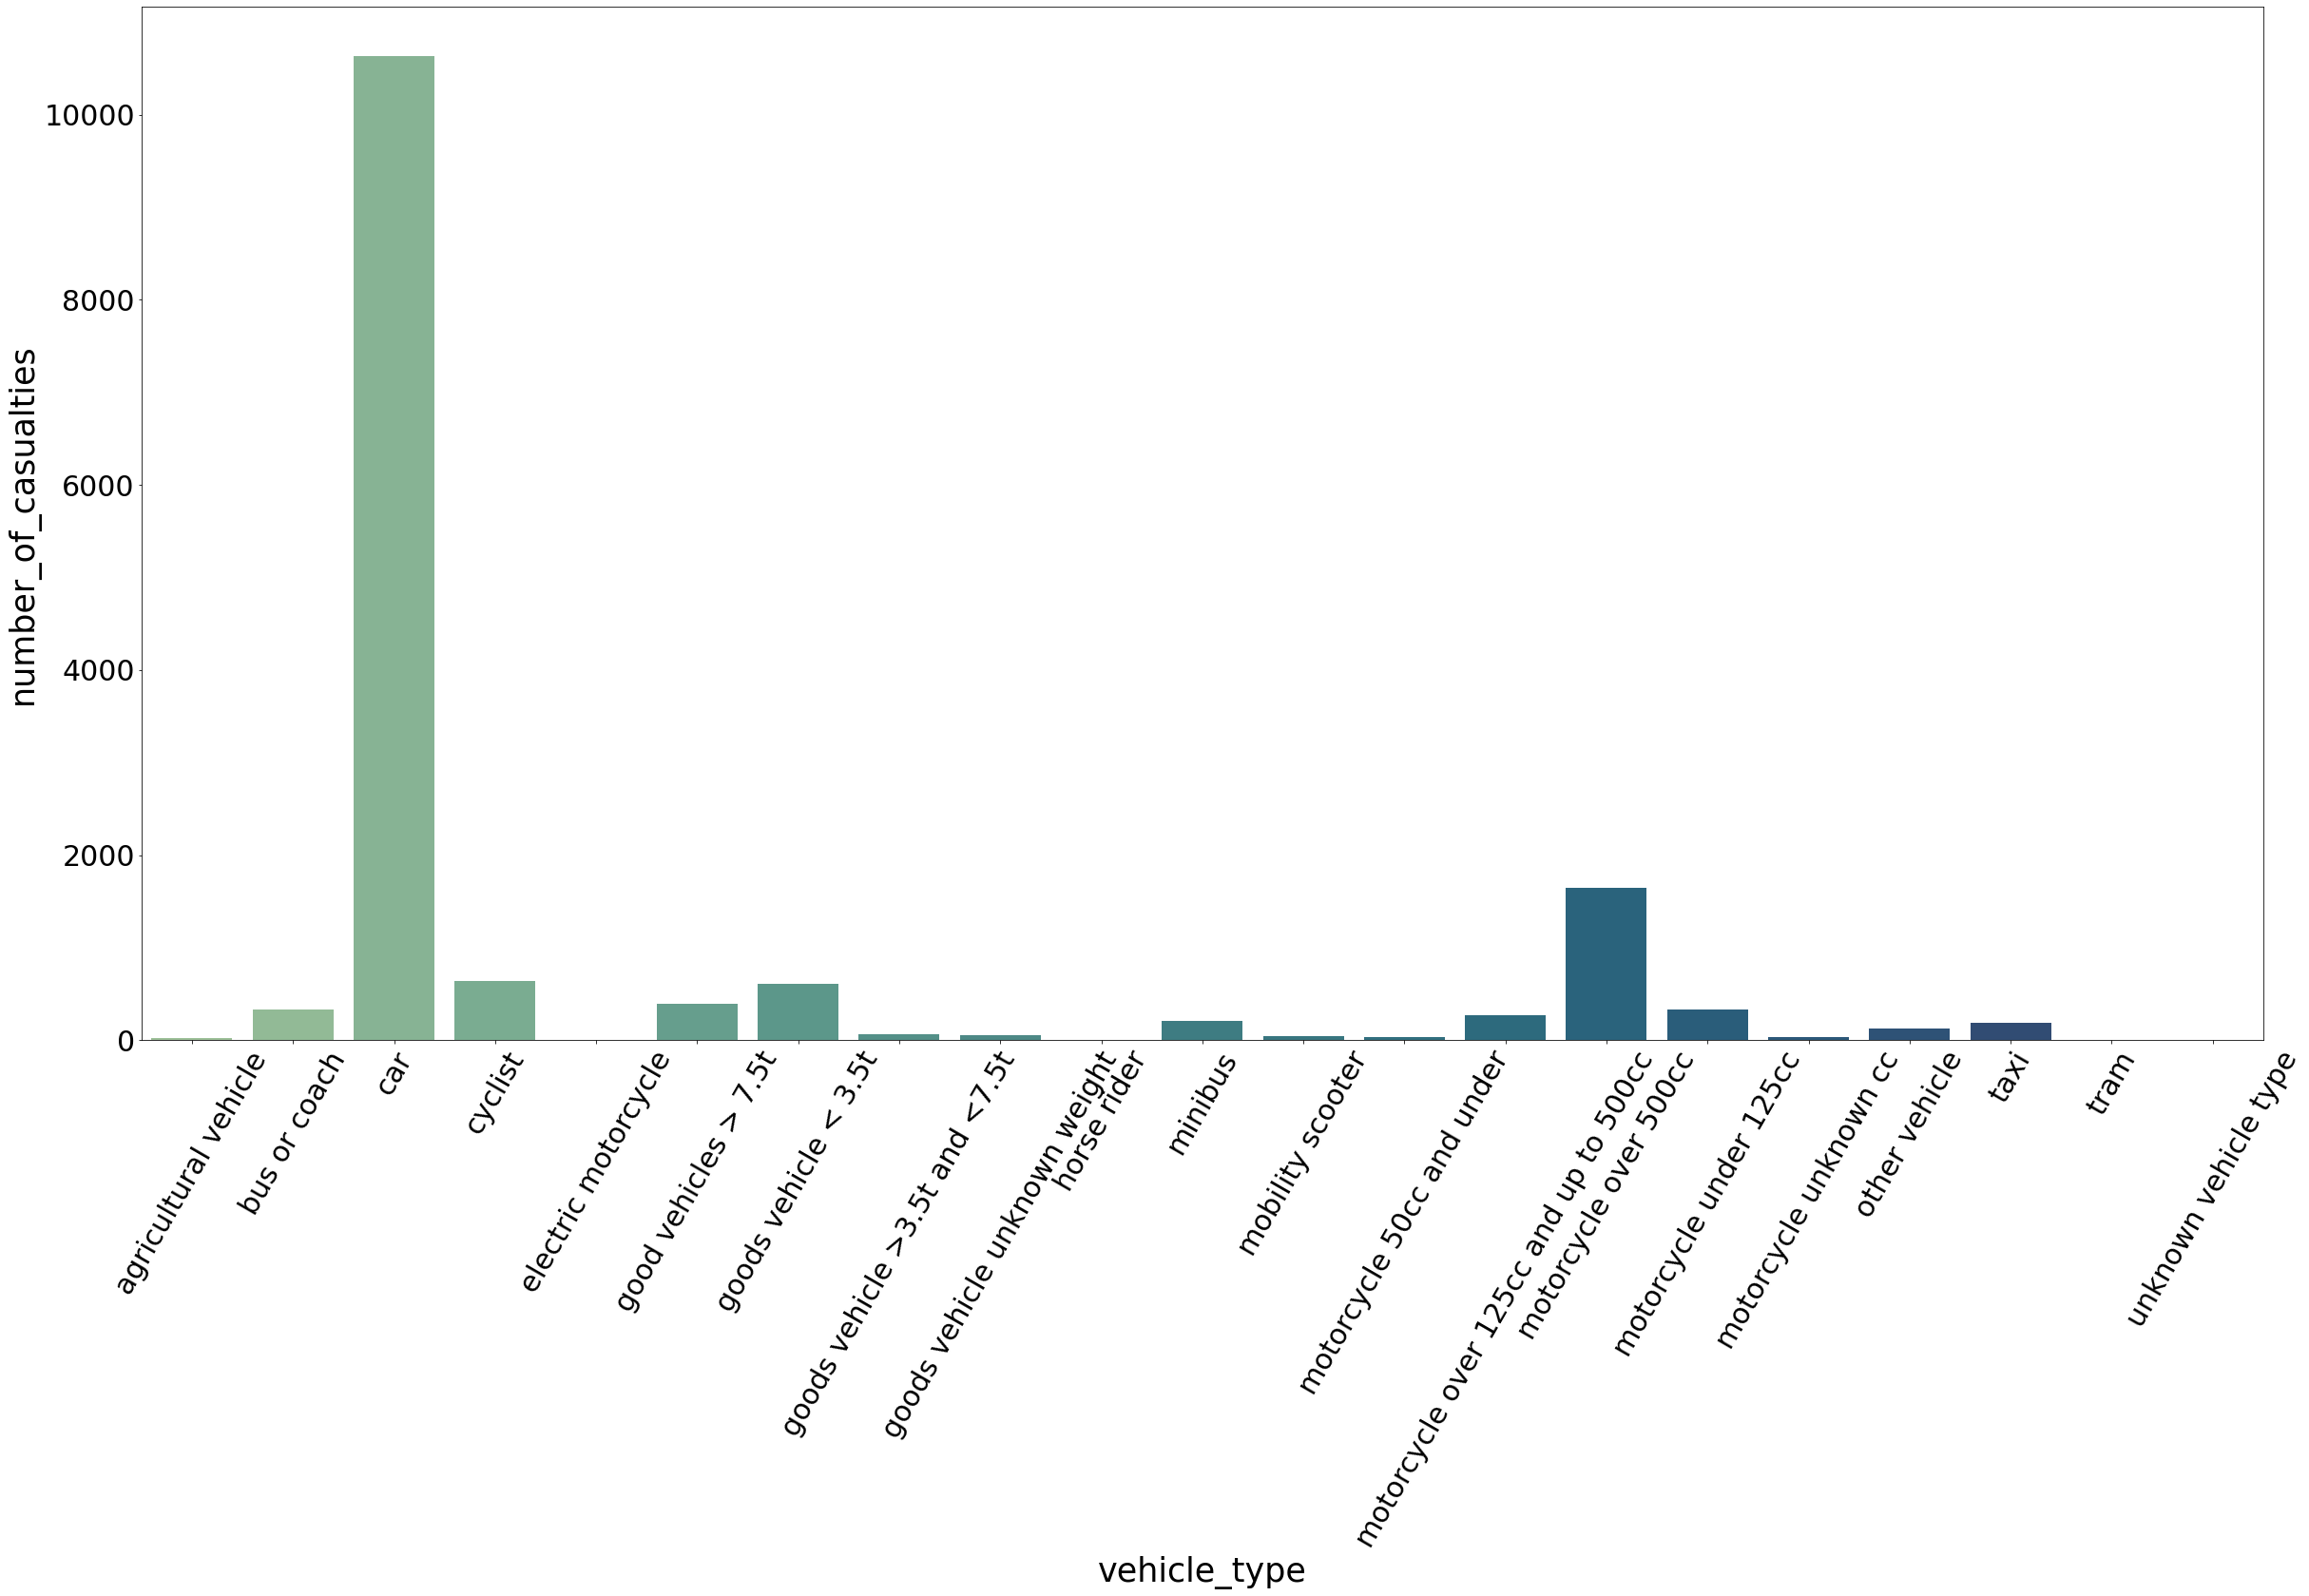

In [33]:
ddr['vehicle_type'].replace([0,1,2,3,4,5,8,9,10,11,16,17,18,19,20,21,22,23,90,97,98,99],\
    ['pedestrian','cyclist','motorcycle 50cc and under','motorcycle under 125cc',
     'motorcycle over 125cc and up to 500cc', 'motorcycle over 500cc','taxi', 'car',
     'minibus','bus or coach', 'horse rider','agricultural vehicle','tram',
     'goods vehicle < 3.5t','goods vehicle >3.5t and <7.5t','good vehicles > 7.5t',
     'mobility scooter','electric motorcycle','other vehicle','motorcycle unknown cc',
     'goods vehicle unknown weight','unknown vehicle type'],inplace=True)


ddx=pd.DataFrame(ddr[ddr['casualty_severity']==1].groupby(['vehicle_type']).sum()['number_of_casualties'])
perc_car=(ddx.iloc[2,0]/ddx['number_of_casualties'].sum())*100

print(ddx)

print("Fatalities caused by cars account for", perc_car.round(2), "% of total fatalities.")

plt.figure(figsize=(40,20))
plt.xlabel('Vehicle type',fontsize=35)
plt.ylabel('Number of casualties',fontsize=35)
plt.xticks(rotation=60, fontsize=30)
plt.yticks(rotation=0, fontsize=30)
sns.barplot(x=ddx.index, y=ddx['number_of_casualties'], palette="crest")
plt.show

- Number of casualties per vehicle type (sorted by accident severity).

In [34]:
ddr=ddf.copy()

In [35]:
moto=ddr.drop(ddr[(ddr['vehicle_type']!=2)  &
                  (ddr['vehicle_type']!=3)  &
                  (ddr['vehicle_type']!=4)  &
                  (ddr['vehicle_type']!=5)  &
                  (ddr['vehicle_type']!=22) &
                  (ddr['vehicle_type']!=23) &
                  (ddr['vehicle_type']!=97) &
                  (ddr['vehicle_type']!=103)&
                  (ddr['vehicle_type']!=104)&
                  (ddr['vehicle_type']!=105)&
                  (ddr['vehicle_type']!=106)].index)
publictransports=ddr.drop(ddr[(ddr['vehicle_type']!=10)&
                    (ddr['vehicle_type']!=11)&
                    (ddr['vehicle_type']!=18)&
                   (ddr['vehicle_type']!=110)].index)
Freighttransports=ddr.drop(ddr[(ddr['vehicle_type']!=20)&
                    (ddr['vehicle_type']!=21)&
                    (ddr['vehicle_type']!=98)&
                    (ddr['vehicle_type']!=19)&
                   (ddr['vehicle_type']!=113)].index)
Cartaxi=ddr.drop(ddr[(ddr['vehicle_type']!=8)&
                    (ddr['vehicle_type']!=9)&
                    (ddr['vehicle_type']!=108)&
                   (ddr['vehicle_type']!=109)].index)
Pedalcycle=ddr.drop(ddr[(ddr['vehicle_type']!=1)].index)

In [36]:
moto.insert(1,'vehicle_category','moto',True)
publictransports.insert(1,'vehicle_category','publictransports',True)
Freighttransports.insert(1,'vehicle_category','Freighttransports',True)
Cartaxi.insert(1,'vehicle_category','Cartaxi',True)
Pedalcycle.insert(1,'vehicle_category','Pedalcycle',True)

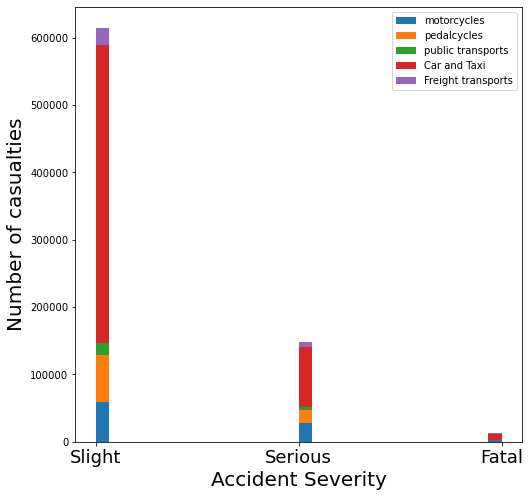

In [37]:
moto['accident_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)
publictransports['accident_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)
Freighttransports['accident_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)
Cartaxi['accident_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)
Pedalcycle['accident_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)

figure = plt.figure(figsize=(8,8))
plt.hist([moto[moto['vehicle_category']=='moto']['accident_severity'], 
          Pedalcycle[Pedalcycle['vehicle_category']=='Pedalcycle']['accident_severity'],
          publictransports[publictransports['vehicle_category']=='publictransports']['accident_severity'],
          Cartaxi[Cartaxi['vehicle_category']=='Cartaxi']['accident_severity'],
         Freighttransports[Freighttransports['vehicle_category']=='Freighttransports']['accident_severity']],
         stacked=True, bins=30, label=['motorcycles','pedalcycles','public transports','Car and Taxi','Freight transports'])
plt.xlabel('Accident Severity', fontsize=20)
plt.ylabel('Number of casualties', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.legend()

- Speed limit per number of accidents (sorted by accident severity).

<Figure size 7200x7200 with 0 Axes>

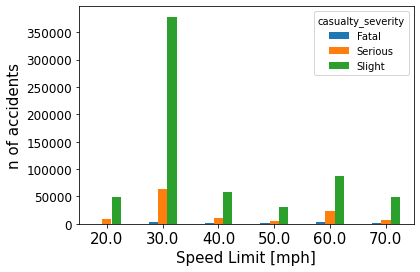

In [38]:
ddr['casualty_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)
plt.figure(figsize=(100,100))
ddr.groupby(['speed_limit','casualty_severity']).size().unstack().plot(kind='bar')
plt.xlabel('Speed Limit [mph]',fontsize=15)
plt.ylabel('n of accidents',fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
plt.show()

- Plotting longitude/latitude to reveal the map of the UK.

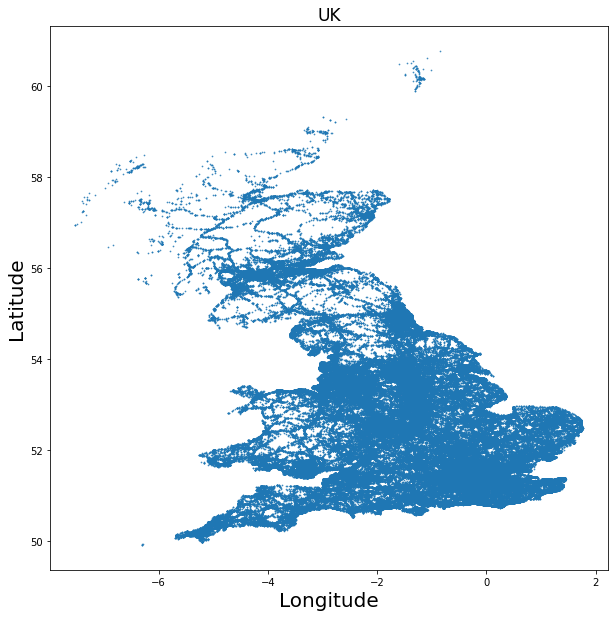

In [39]:
plt.figure(figsize=(10, 10))
plt.scatter(ddf['longitude'],ddf['latitude'], s=0.5, alpha=0.8)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('UK',size=17)
plt.show()

- Zoom in Wales state + speed limit and n of casualties

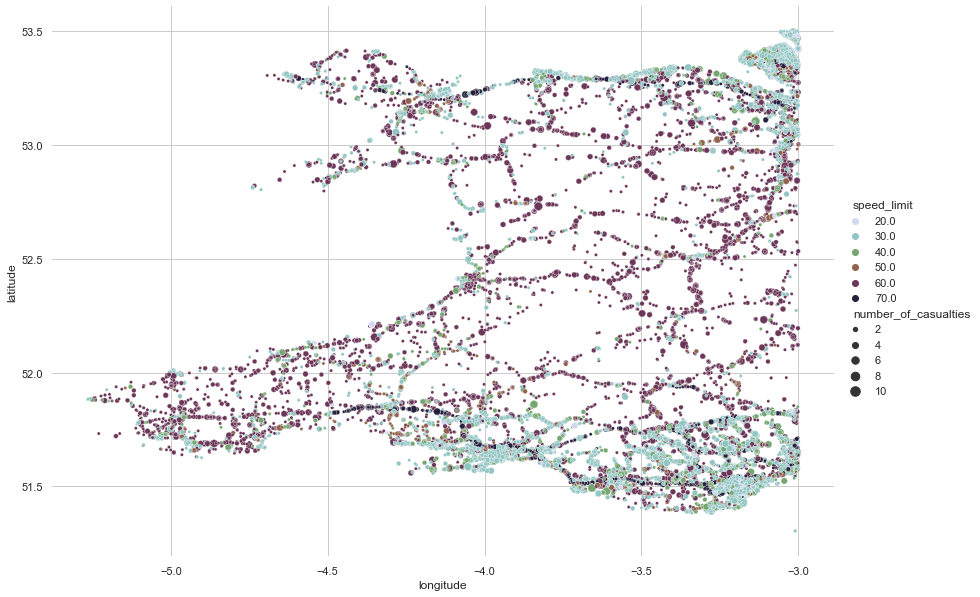

In [40]:
dd_wales=ddf[(ddf['latitude']>51.301) & (ddf['latitude']<53.5) & (ddf['longitude']>-5.9) & (ddf['longitude']<-3)]
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=1000, as_cmap=True)

g = sns.relplot(data=dd_wales, x="longitude", y="latitude", hue="speed_limit", size="number_of_casualties",palette=cmap,
                sizes=(10, 100), height=8.27, aspect=11.7/8.27)

g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

- Freight fatal accidents per State in 2018.

In [41]:
ddf2018=ddf.drop(ddf[(ddf['accident_year']!=2018)].index)

In [42]:
freight=ddf2018.drop(ddf2018[(ddf2018['vehicle_type']!=20)& \
                         (ddf2018['vehicle_type']!=21)& \
                         (ddf2018['vehicle_type']!=98)& \
                         (ddf2018['vehicle_type']!=19)& \
                         (ddf2018['vehicle_type']!=113)].index)

In [43]:
freight['accident_severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)
freight_fatal=freight.drop(freight[(freight['accident_severity']!='Fatal')].index)

In [44]:
import pandas as pd
import io
from geopy.geocoders import Nominatim
from geopy.point import Point
geolocator = Nominatim(user_agent="geoapiExercises")


def state(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    state = address.get('state', '')
    row['state'] = state

    return row


freight_fatal = freight_fatal.apply(state, axis=1)

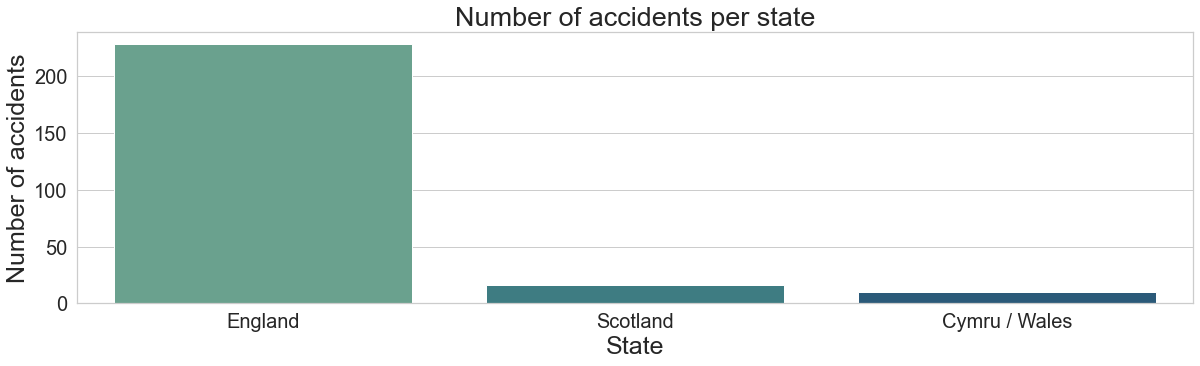

In [45]:
plt.figure(figsize=(20, 5))
sns.barplot(x=freight_fatal['state'].value_counts().index, y=freight_fatal['state'].value_counts(), palette="crest")
plt.xlabel('State',fontsize=25)
plt.ylabel('Number of accidents',fontsize=25)
plt.title('Number of accidents per state',fontsize=27)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.show()

In [46]:
freight_fatal['state'].value_counts()

England          228
Scotland          16
Cymru / Wales     10
Name: state, dtype: int64

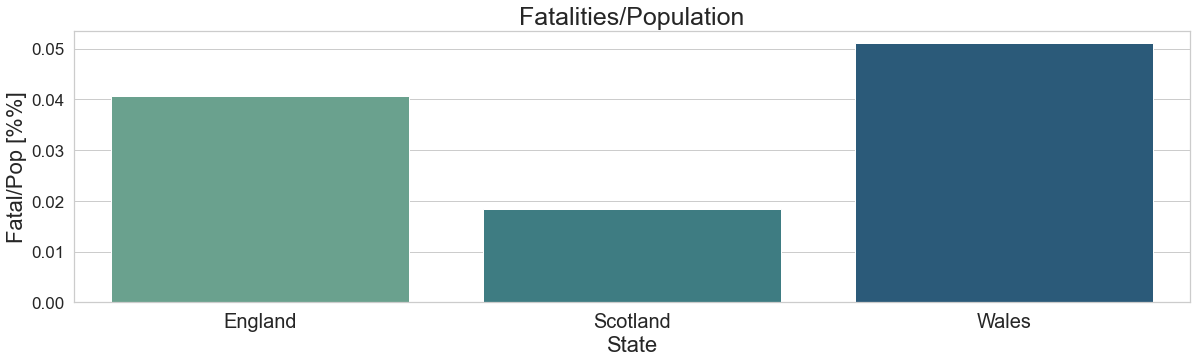

In [47]:
state = ['England','Scotland','Wales']
popratio = [0.04073,0.01834,0.05102]
plt.figure(figsize=(20, 5))
sns.barplot(x=state, y=popratio, palette="crest")
plt.xlabel('State',fontsize=22)
plt.ylabel('Fatal/Pop [%%]',fontsize=22)
plt.title('Fatalities/Population',fontsize=25)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=17)
plt.show()

- Heat map and considerations.

In [48]:
import folium
from folium import plugins
from folium.plugins import HeatMap

coords=[51.633, -0.0539]
my_map = folium.Map(location=[51.5074, 0.1278],
                    zoom_start = 13) # for UK 


heat_df = ddf[['latitude', 'longitude','accident_severity']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude','accident_severity'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude'],row['accident_severity']] for index, row in heat_df.iterrows()]

folium.Marker(location=coords).add_to(my_map)

my_map.add_child(plugins.HeatMap(heat_data))
my_map.save('map.html')

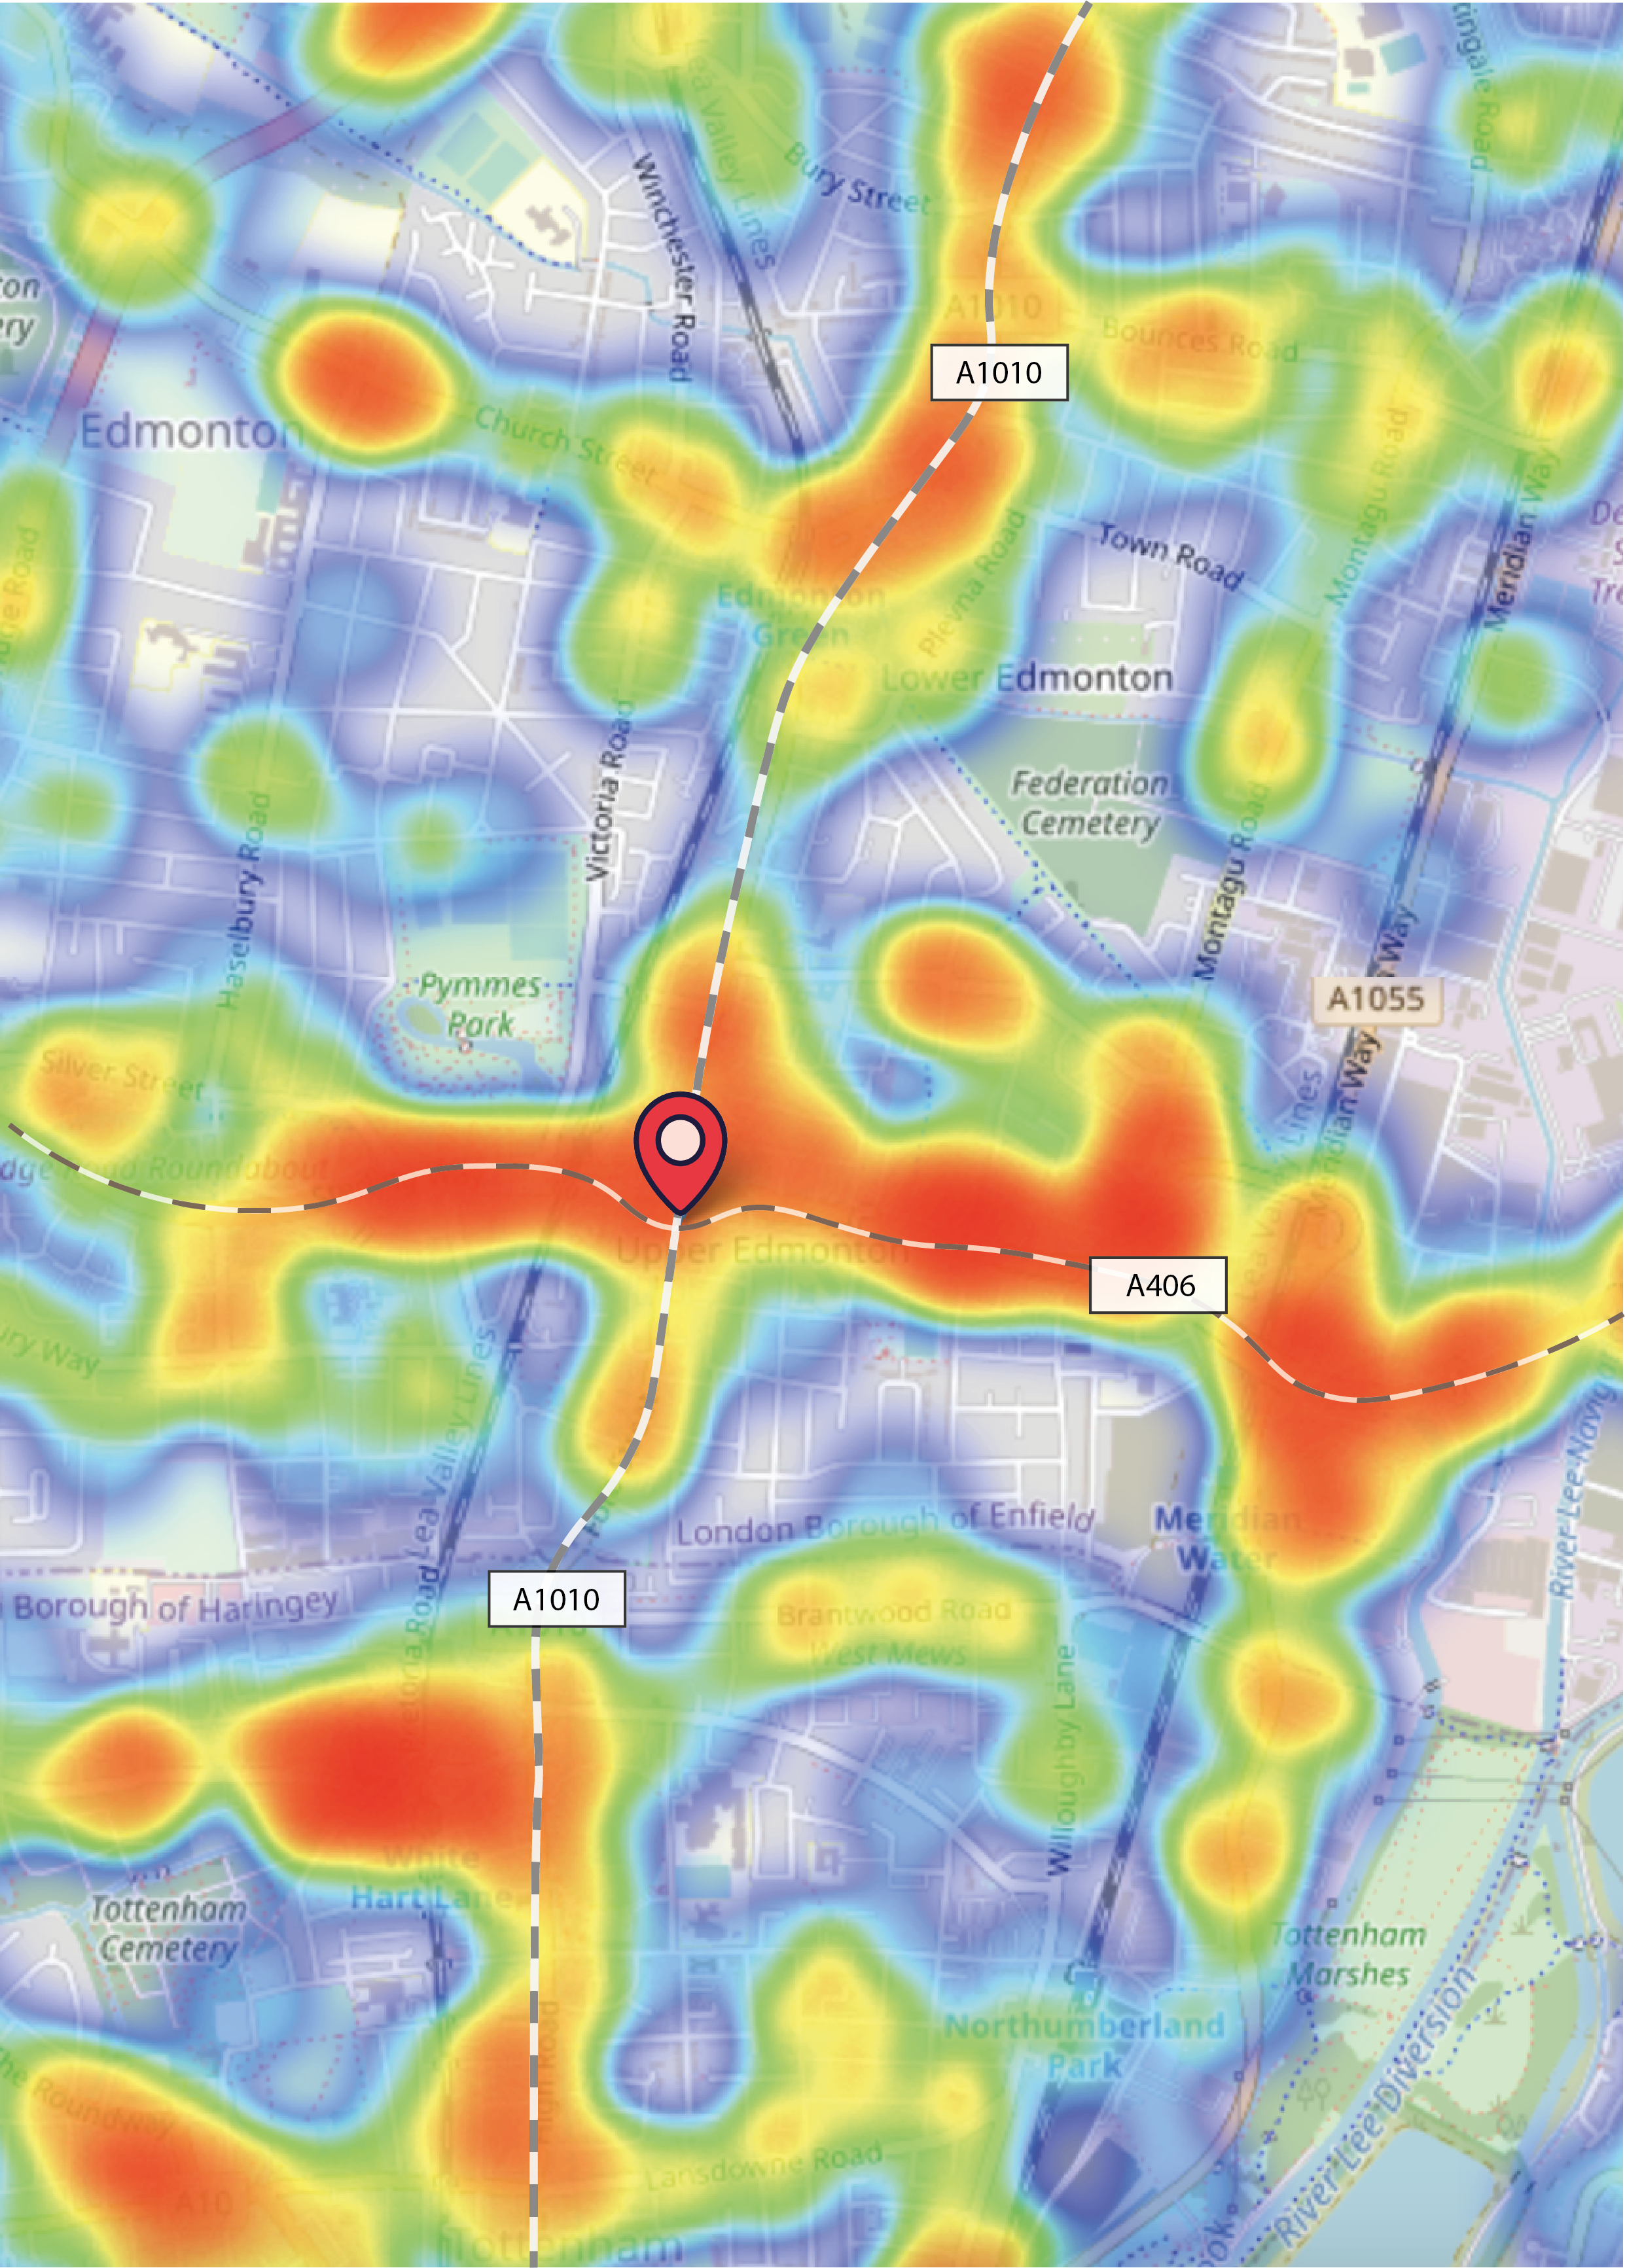

In [49]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = "C:\\Users\\loren\\Desktop\\DataScienceLorenzo\\heatmapA1010-A406.png"
Image(filename = PATH, width=300, height=300)

### CONTRIBUTING FACTORS TO TRAFFIC ACCIDENTS

In [50]:
ddfcopy=ddf.copy()

In [51]:
ddf=ddfcopy

In [52]:
ddf['date'] = pd.to_datetime(ddf['date'])
ddf['month'] = ddf['date'].dt.month
ddf['day_of_week'] = ddf['date'].dt.day_of_week

- How weather, light and road surface, influence traffic accidents.

<function matplotlib.pyplot.show(close=None, block=None)>

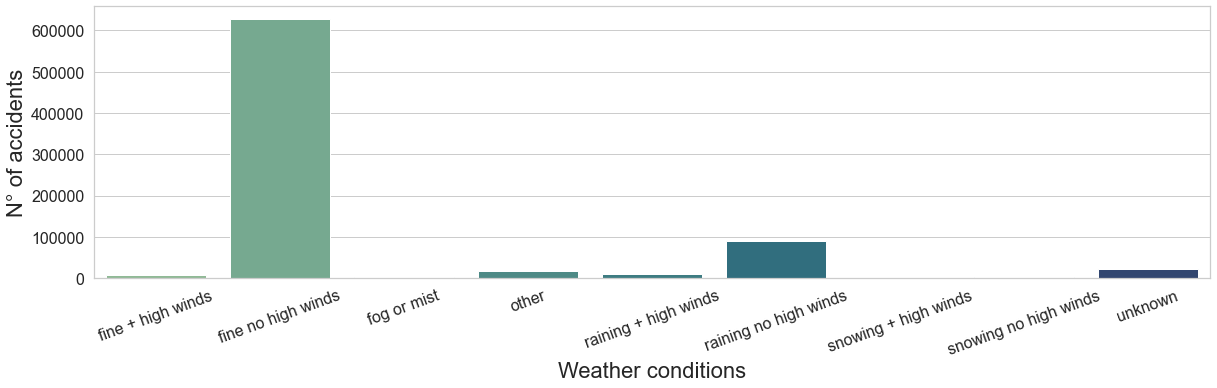

In [53]:
ddr['weather_conditions'].replace([1,2,3,4,5,6,7,8,9],['fine no high winds','raining no high winds',
                                                       'snowing no high winds', 'fine + high winds',
                                                       'raining + high winds','snowing + high winds',
                                                       'fog or mist','other','unknown'],inplace=True)

ddw=pd.DataFrame(ddr.groupby(['weather_conditions']).count())
ddw

plt.figure(figsize=(20,5))
sns.barplot(y=ddw['accident_index'], x=ddw.index, palette="crest")
plt.xlabel('Weather conditions',fontsize=22)
plt.ylabel('N° of accidents',fontsize=22)
plt.xticks(rotation=20, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

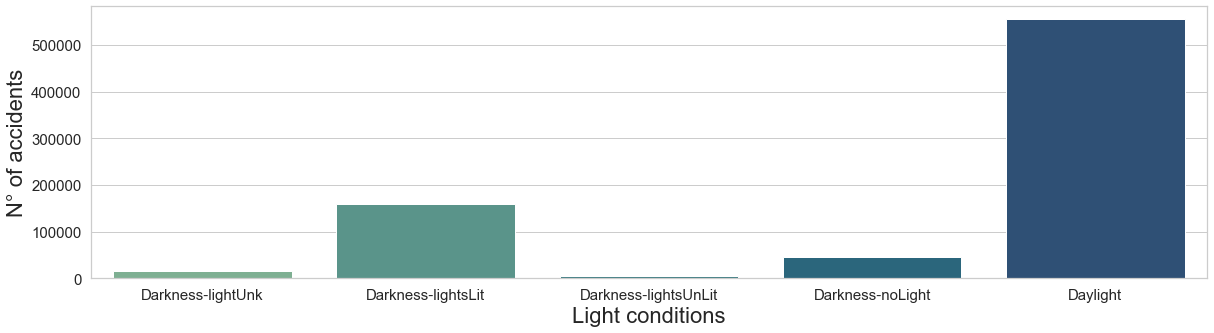

In [54]:
ddr['light_conditions'].replace([1,4,5,6,7],['Daylight','Darkness-lightsLit',
                                                       'Darkness-lightsUnLit', 'Darkness-noLight',
                                                       'Darkness-lightUnk'],inplace=True)

ddl=pd.DataFrame(ddr.groupby(['light_conditions']).count())
ddl

plt.figure(figsize=(20,5))
sns.barplot(y=ddl['accident_index'], x=ddl.index, palette="crest")
plt.xlabel('Light conditions',fontsize=22)
plt.ylabel('N° of accidents',fontsize=22)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

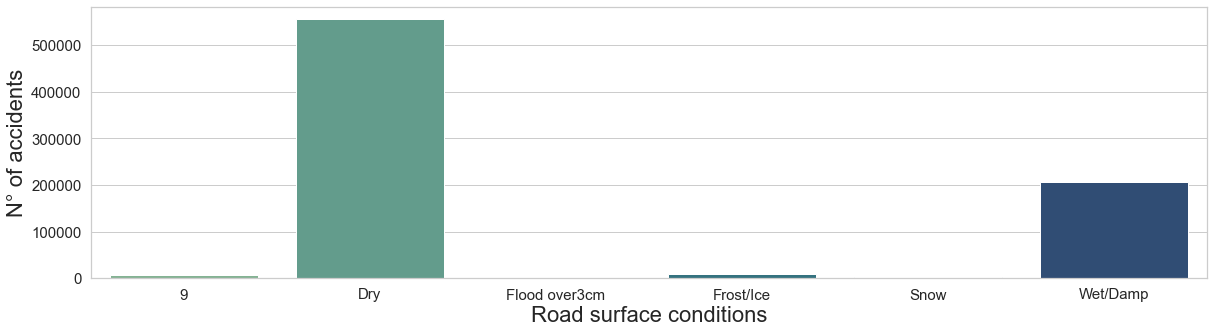

In [55]:
ddr['road_surface_conditions'].replace([1,2,3,4,5,6,7],['Dry','Wet/Damp',
                                                        'Snow', 'Frost/Ice',
                                                        'Flood over3cm','Oil/Diesel'
                                                        'Mud','2'],inplace=True)

dds=pd.DataFrame(ddr.groupby(['road_surface_conditions']).count())
dds

plt.figure(figsize=(20,5))
sns.barplot(y=dds['accident_index'], x=dds.index, palette="crest")
plt.xlabel('Road surface conditions',fontsize=22)
plt.ylabel('N° of accidents',fontsize=22)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show


- I split the dataset into 4 seasons.

In [56]:
summer=pd.DataFrame()
summer=summer.append(ddf[(ddf['date']>'2016-06-21') & (ddf['date']<'2016-09-23')])
summer=summer.append(ddf[(ddf['date']>'2017-06-21') & (ddf['date']<'2017-09-23')])
summer=summer.append(ddf[(ddf['date']>'2018-06-21') & (ddf['date']<'2018-09-23')])
summer=summer.append(ddf[(ddf['date']>'2019-06-21') & (ddf['date']<'2019-09-23')])
summer=summer.append(ddf[(ddf['date']>'2020-06-21') & (ddf['date']<'2020-09-23')])

winter=pd.DataFrame()
winter=winter.append(ddf[(ddf['date']>'2016-12-21') & (ddf['date']<'2017-03-20')])
winter=winter.append(ddf[(ddf['date']>'2017-12-21') & (ddf['date']<'2018-03-20')])
winter=winter.append(ddf[(ddf['date']>'2018-12-21') & (ddf['date']<'2019-03-20')])
winter=winter.append(ddf[(ddf['date']>'2019-12-21') & (ddf['date']<'2020-03-20')])
winter=winter.append(ddf[(ddf['date']>'2020-12-21') & (ddf['date']<'2021-03-20')])

spring=pd.DataFrame()
spring=spring.append(ddf[(ddf['date']>'2016-03-20') & (ddf['date']<'2016-06-21')])
spring=spring.append(ddf[(ddf['date']>'2017-03-20') & (ddf['date']<'2017-06-21')])
spring=spring.append(ddf[(ddf['date']>'2018-03-20') & (ddf['date']<'2018-06-21')])
spring=spring.append(ddf[(ddf['date']>'2019-03-20') & (ddf['date']<'2019-06-21')])
spring=spring.append(ddf[(ddf['date']>'2020-03-20') & (ddf['date']<'2020-06-21')])

autumn=pd.DataFrame()
autumn=autumn.append(ddf[(ddf['date']>'2016-09-22') & (ddf['date']<'2016-12-21')])
autumn=autumn.append(ddf[(ddf['date']>'2017-09-22') & (ddf['date']<'2017-12-21')])
autumn=autumn.append(ddf[(ddf['date']>'2018-09-22') & (ddf['date']<'2018-12-21')])
autumn=autumn.append(ddf[(ddf['date']>'2019-09-22') & (ddf['date']<'2019-12-21')])
autumn=autumn.append(ddf[(ddf['date']>'2020-09-22') & (ddf['date']<'2020-12-21')])

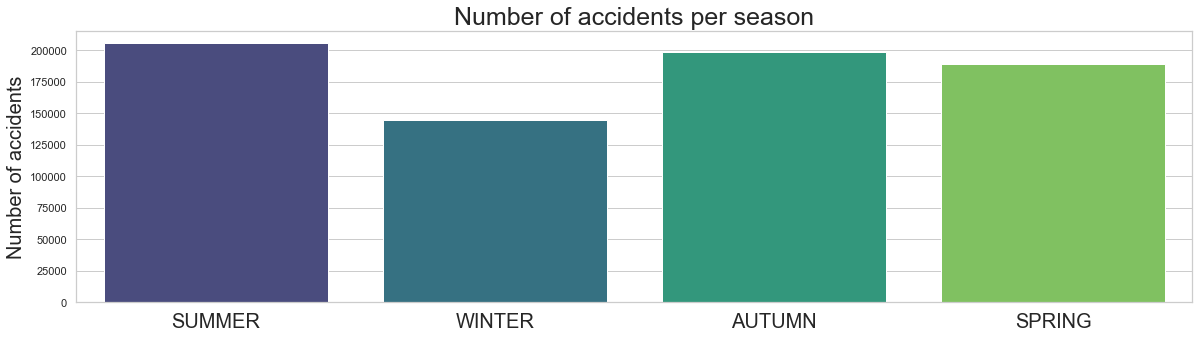

In [57]:
labels = ['SUMMER', 'WINTER', 'AUTUMN', 'SPRING']
index = [len(summer), len(winter), len(autumn), len(spring)]
plt.figure(figsize=(20, 5))
sns.barplot(x = labels, y=index, palette="viridis")
plt.ylabel('Number of accidents',fontsize=20)
plt.title('Number of accidents per season',fontsize=25)
plt.xticks(rotation=0, fontsize=20)
plt.show()

- Which day of week has the most accidents?

In [58]:
ddf['day_of_week'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

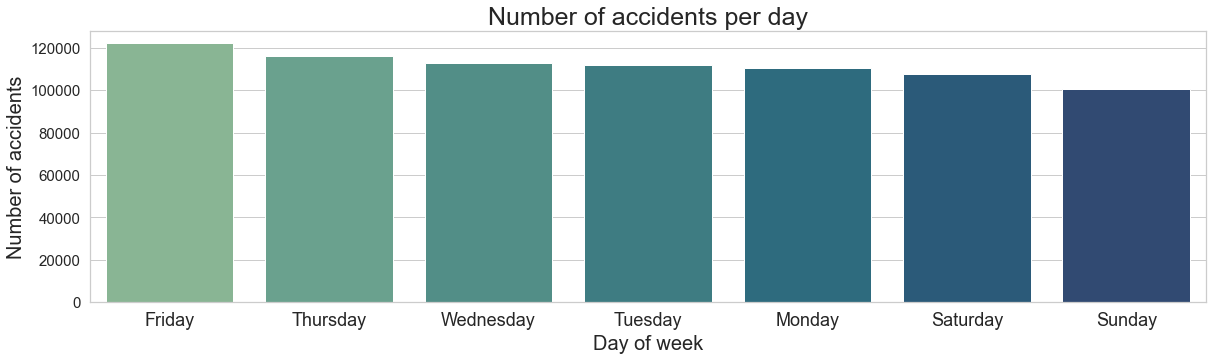

In [92]:
plt.figure(figsize=(20, 5))
sns.barplot(x=ddf['day_of_week'].value_counts().index, y=ddf['day_of_week'].value_counts(), palette="crest")
plt.xlabel('Day of week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.title('Number of accidents per day',fontsize=25)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=15)
plt.show()

- Which hour of the day has the most accidents?

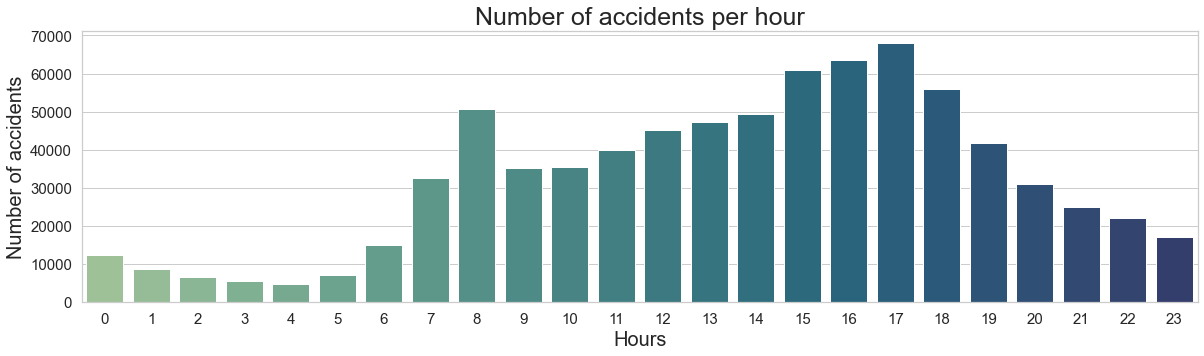

In [93]:
ddf['time'] = pd.to_datetime(ddf['time'])
ddf['hour_stamp'] = ddf['time'].dt.hour
plt.figure(figsize=(20, 5))
sns.barplot(x=ddf['hour_stamp'].value_counts().index, y=ddf['hour_stamp'].value_counts(), palette="crest")
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.title('Number of accidents per hour',fontsize=25)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()

- Did the Covid-19 lockdowns affect the number of traffic accidents or their severity?

In [61]:
lockdown_years=pd.DataFrame()
lockdown_years=lockdown_years.append(ddf[(ddf['date']>'2019-07-01') & (ddf['date']<'2021-01-01')])

prelockdown=pd.DataFrame()
lockdown=pd.DataFrame()
postlockdown=pd.DataFrame()

#prelockdown=prelockdown.append(ddf[(ddf['date']>'2019-07-01') & (ddf['date']<'2020-03-01')])
#lockdown=prelockdown.append(ddf[(ddf['date']>'2020-03-02') & (ddf['date']<'2020-04-30')])
#postlockdown=prelockdown.append(ddf[(ddf['date']>'2020-05-01') & (ddf['date']<'2021-01-01')])

In [62]:
lockdown_years=pd.DataFrame()
lockdown_years=lockdown_years.append(ddf[(ddf['date']>'2019-07-01') & (ddf['date']<'2021-01-01')])

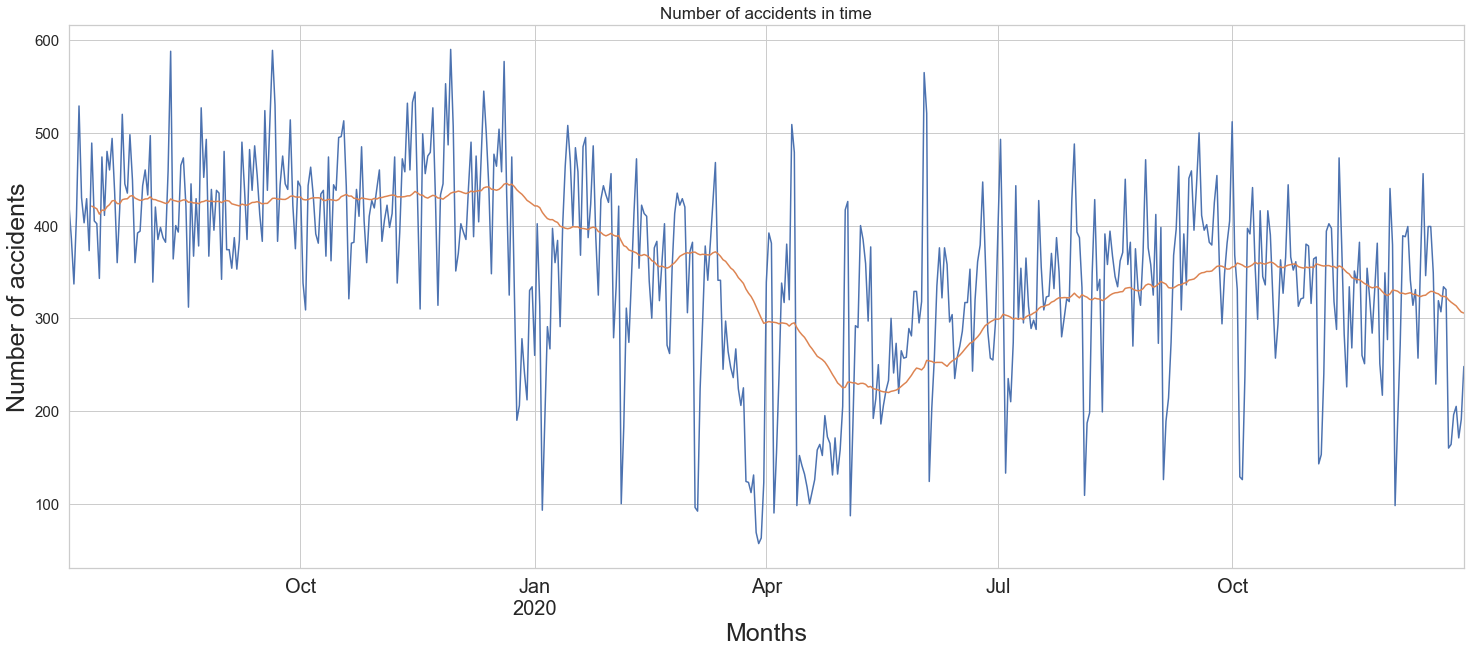

In [95]:
plt.figure(figsize = (25,10))
lockdown_years.groupby(['date']).count()['index'].plot()
lockdown_years.groupby(['date']).count()['index'].rolling(min_periods = 10, window = 60, center = False).mean().plot()

    plt.xlabel('Months',size=25)
    plt.ylabel('Number of accidents',size=25)
    plt.title('Number of accidents in time',size=17)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=15)
    plt.show()

In [64]:
ddf['date']

0        2016-01-11
1        2016-01-11
2        2016-01-11
3        2016-01-11
4        2016-01-11
            ...    
781711   2020-12-08
781712   2020-11-13
781713   2020-04-15
781714   2020-12-15
781715   2020-08-25
Name: date, Length: 781431, dtype: datetime64[ns]

##  CORRELATION ANALYSIS

- Here it is the correlation matrix.

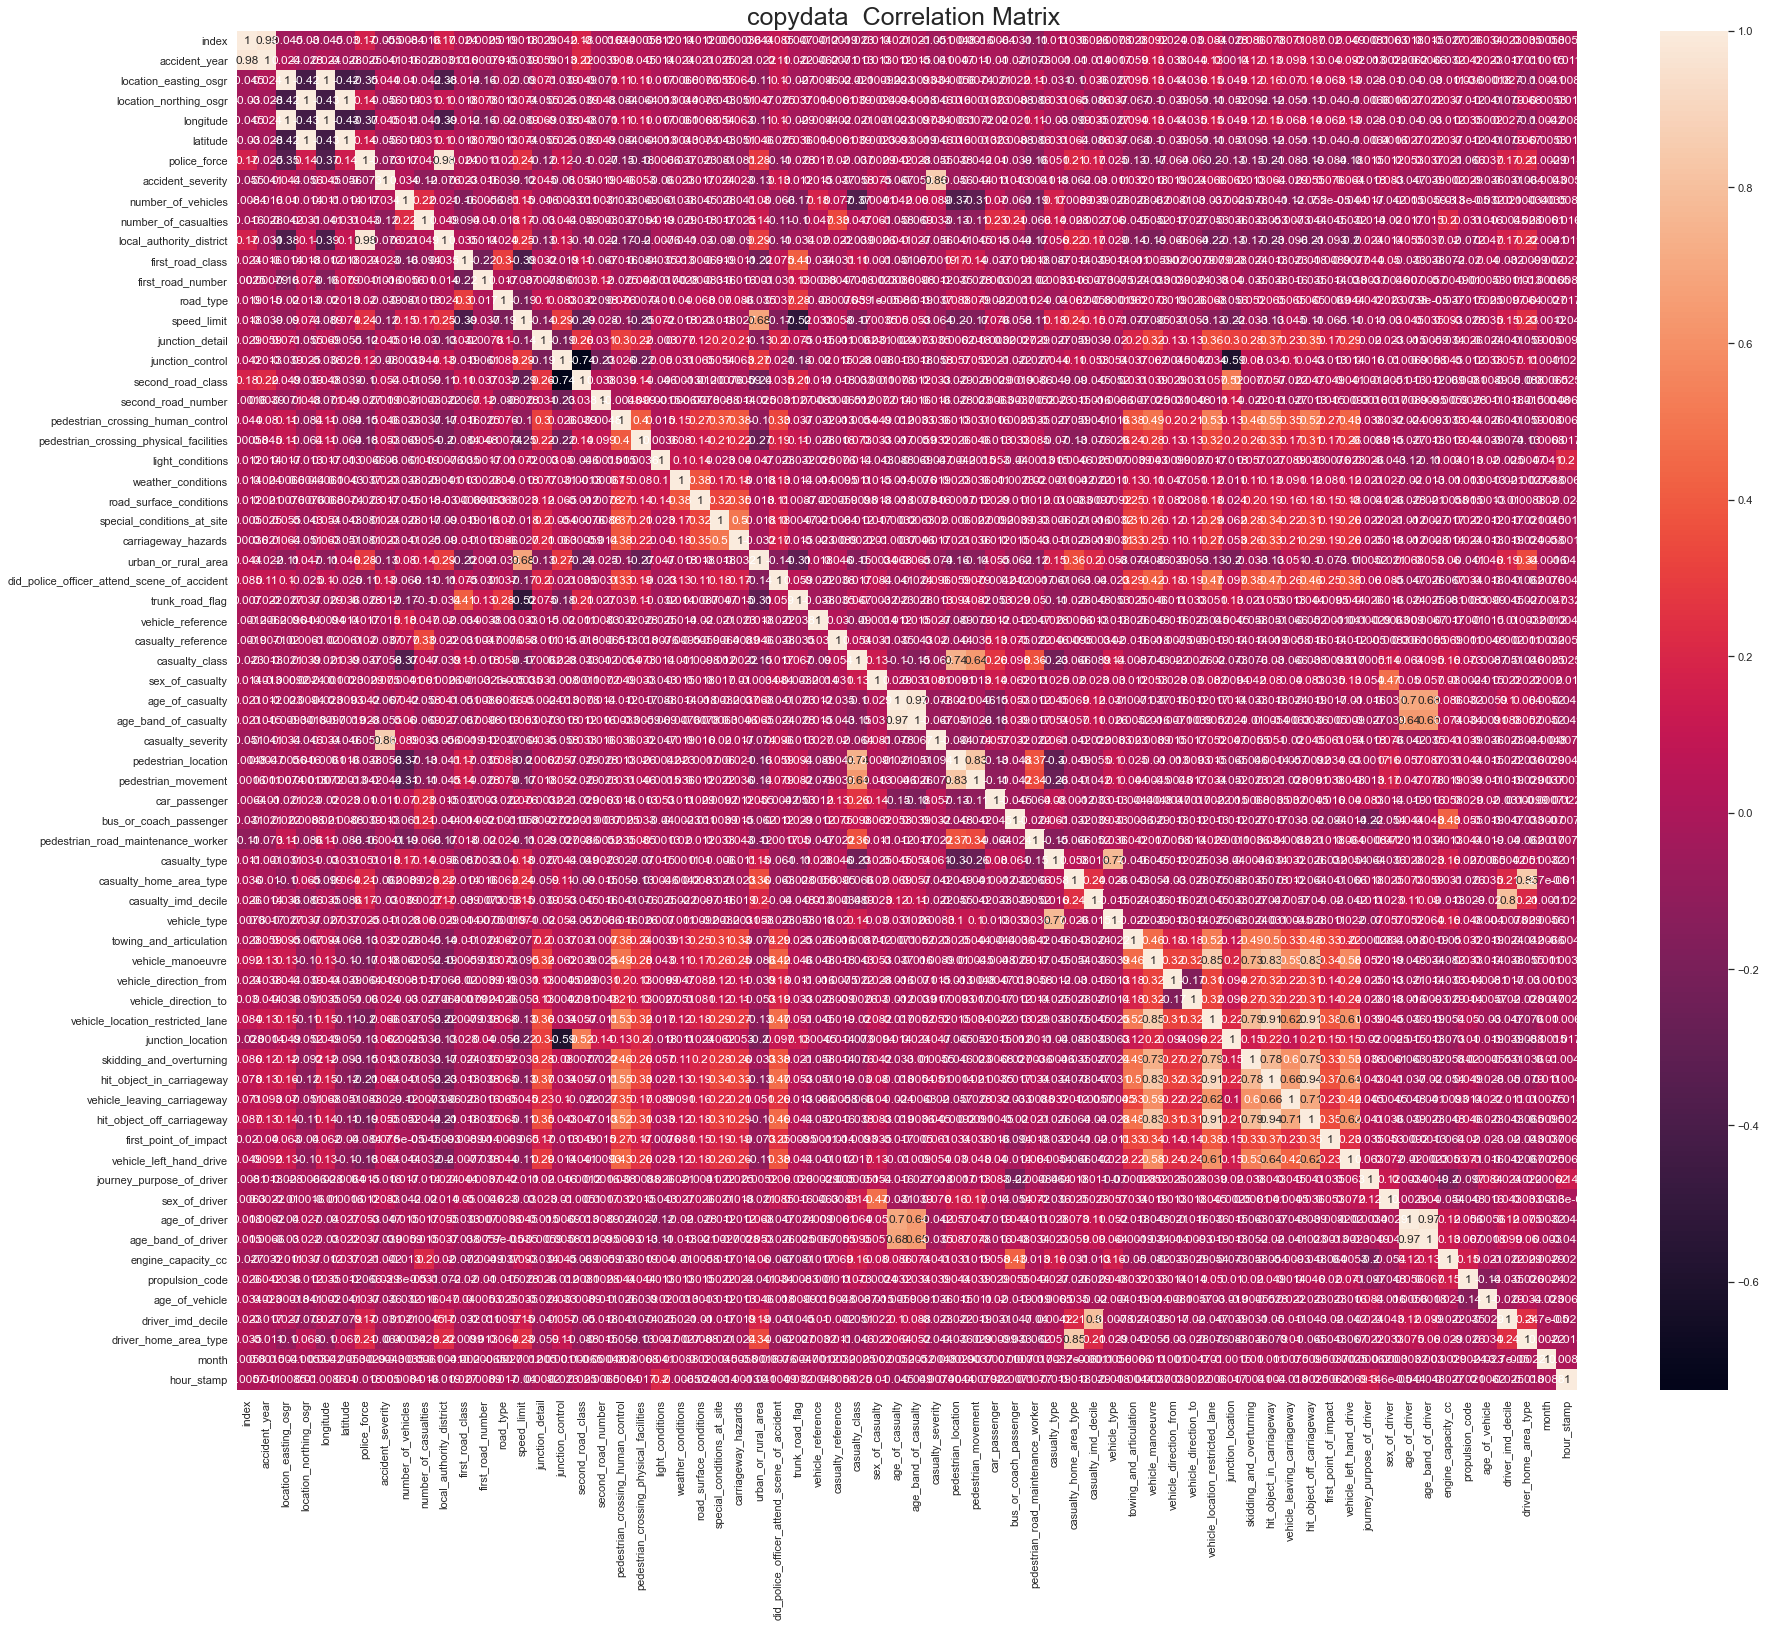

In [65]:
corrMatrix = ddf.corr(method='pearson')

fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.title('copydata  Correlation Matrix ', fontsize=25)
plt.show()

## REGRESSION

- Starting from the population dataset, make a linear regression based on the 5 years.

In [66]:
ddf.loc[ddf['accident_year'] == 2016, 'population'] = 65648100
ddf.loc[ddf['accident_year'] == 2017, 'population'] = 66040200
ddf.loc[ddf['accident_year'] == 2018, 'population'] = 66435600
ddf.loc[ddf['accident_year'] == 2019, 'population'] = 66796800
ddf.loc[ddf['accident_year'] == 2020, 'population'] = 67081000

ddf.loc[ddf['population'] == 65648100, 'number_of_accidents'] = 181311
ddf.loc[ddf['population'] == 66040200, 'number_of_accidents'] = 170951
ddf.loc[ddf['population'] == 66435600, 'number_of_accidents'] = 160491
ddf.loc[ddf['population'] == 66796800, 'number_of_accidents'] = 153114
ddf.loc[ddf['population'] == 67081000, 'number_of_accidents'] = 115564

In [68]:
models_confrontation = []

In [69]:
X = ddf[["number_of_accidents"]].values
y = ddf[["population"]].values

In [72]:
%%time
lr_model = LinearRegression()
lr_model.fit(X,y) # a quanto pare attiva il .coef_ e il .intercept_
lr_score = cross_val_score(lr_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
models_confrontation = np.append(models_confrontation,lr_score.mean())
print("Score %.3f +/- %.3f"%(lr_score.mean(),lr_score.std()))

Score 0.840 +/- 0.000
Wall time: 463 ms


In [73]:
coef = lr_model.coef_
intercept = lr_model.intercept_
coef, intercept

(array([[-22.22887913]]), array([69878561.58928809]))

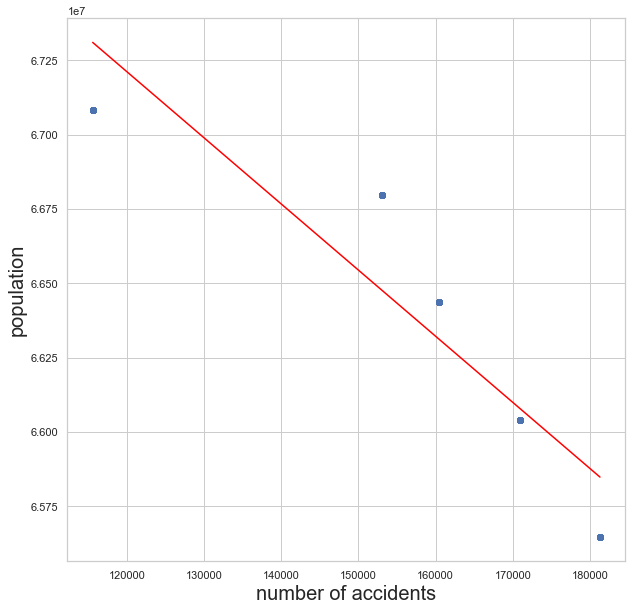

In [74]:
y_hat = X*coef + intercept
plt.figure(figsize=(10, 10)) 
plt.plot(X,y, 'bo',alpha=0.5)
plt.xlabel('number of accidents',fontsize=20)
plt.ylabel('population',fontsize=20)
plt.plot(X, y_hat, c='red')
plt.show()

## CLASSIFICATION

- Now, do the classification and compare the models. The classification is the right approach with this kind of data (not numerical but categorical data).

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [76]:
y=ddf.loc[:50000]['accident_severity']
X=ddf.loc[:50000][['light_conditions','vehicle_type', 'weather_conditions', 'road_surface_conditions', 'first_point_of_impact']]

In [77]:
X['light_conditions']=X['light_conditions'].replace(-1,1)
X['weather_conditions']=X['weather_conditions'].replace(-1,1)
X['vehicle_type']=X['vehicle_type'].replace(-1,9)
X['road_surface_conditions']=X['road_surface_conditions'].replace(-1,9)
X['first_point_of_impact']=X['first_point_of_impact'].replace(-1,9)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- Logistic regression.

In [79]:
numeric_features = []
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])

categorical_features=['light_conditions','vehicle_type', 'weather_conditions', 'road_surface_conditions',
                      'first_point_of_impact']
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant')),
('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

clsf = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', LogisticRegression(max_iter=100, multi_class='ovr', class_weight='balanced'))]) #no regularization

lr=clsf.fit(X_train, y_train)

- Logistic regression (with regularization).

In [80]:
clsf1 = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', LogisticRegression(multi_class='multinomial', penalty='l2', C=10000, solver='lbfgs' , max_iter=100))])
lr_reg=clsf1.fit(X_test, y_test)

- Naive Bayes.

In [81]:
#NAIVE BAYES

nb_ovr = OneVsRestClassifier(GaussianNB())

- K-nearest neighbors.

In [82]:
#K-NEAREST NEIGHRBORS

knn = KNeighborsClassifier(weights='distance')

In [83]:
clf_array=[clsf, clsf1, nb_ovr, knn]

In [84]:
Prec = []
Rec = []
Acc = []

for clf in clf_array:
    vanilla_scores = cross_val_score(clf,X_train, y_train, cv=10, )

    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    CF = confusion_matrix(y_test,y_pred)
    Precision = precision_score(y_pred,y_test, average='micro')
    Recall = recall_score(y_test,y_pred, average='micro')
    Prec_class = precision_score(y_test,y_pred,zero_division=0,average=None)
    Rec_class = recall_score(y_test,y_pred,zero_division=0,average=None)

    Prec.append(Precision)
    Rec.append(Recall)
    Acc.append(round(vanilla_scores.mean(),4))

    print(clf.__class__.__name__, 'MEAN: ', round(vanilla_scores.mean(),4),
    'STD: ', round(vanilla_scores.std(),4))
    print('Prec =',round(Precision,4),' ',' ','Prec_per_class =',Prec_class)
    print('Rec =',round(Recall,4),' ',' ','Rec_per_class =',Rec_class)

    print(' ')

print(' ')

Pipeline MEAN:  0.4467 STD:  0.0106
Prec = 0.4571     Prec_per_class = [0.02455953 0.15884194 0.91218262]
Rec = 0.4571     Rec_per_class = [0.44660194 0.48954984 0.45255981]
 
Pipeline MEAN:  0.8615 STD:  0.0007
Prec = 0.8648     Prec_per_class = [0.         0.         0.86523262]
Rec = 0.8648     Rec_per_class = [0.         0.         0.99942217]
 
OneVsRestClassifier MEAN:  0.8572 STD:  0.0008
Prec = 0.8604     Prec_per_class = [0.         0.09677419 0.86516402]
Rec = 0.8604     Rec_per_class = [0.         0.00482315 0.99364382]
 
KNeighborsClassifier MEAN:  0.8413 STD:  0.02
Prec = 0.8605     Prec_per_class = [0.19047619 0.26804124 0.86773932]
Rec = 0.8605     Rec_per_class = [0.03883495 0.02090032 0.99098579]
 
 


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

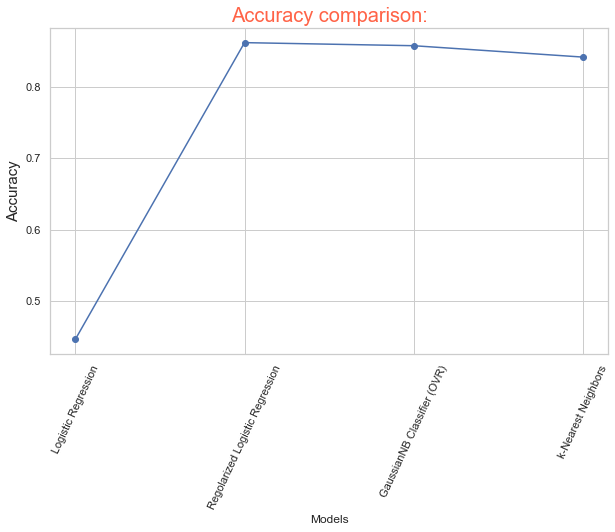

In [85]:
models = ['Logistic Regression','Regolarized Logistic Regression','GaussianNB Classifier (OVR)', 'k-Nearest Neighbors']

plt.figure(figsize=(10, 6))
plt.plot(models, Acc, marker="o")
plt.title("Accuracy comparison:", fontsize=20, color="tomato")
plt.xlabel("Models")
plt.ylabel("Accuracy",fontsize=15)
plt.xticks(rotation=65)

# CONCLUSION

- Data analysis as a decision making and communicative tool
- Identification of oppurtunities for safety improvements (i.e. most dangerous junction in London)
- Prediction as a means to reduce risk